# PANDAS

## Introducing Pandas Objects

In [1]:
import numpy as np
import pandas as pd

- Three fundamental Pandas data structures: *the Series, DataFrame, and Index*.

### The Pandas Series Object

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

***
Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:
***

In [4]:
data[1]

0.5

In [5]:
data[1:3]

1    0.50
2    0.75
dtype: float64

#### Series as generalized NumPy array

In [6]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
    
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [7]:
data['b']

0.5

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7]) # We can even use noncontiguous or nonsequential indices
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

#### Series as specialized dictionary

In [10]:
population_dict = {'California': 38332521,
 'Texas': 26448193,
 'New York': 19651127,
 'Florida': 19552860,
 'Illinois': 12882135}

In [11]:
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [12]:
population['California']

38332521

<div class="alert alert-block alert-danger">
<b>Unlike a dictionary, though, the Series also supports array-style operations such as slicing.</b> 
</div>

In [13]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

#### Constructing Series objects

In [14]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [15]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [16]:
pd.Series({2:'a', 1:'b', 3:'c'}) #data can be a dictionary, in which index defaults to the sorted dictionary keys

2    a
1    b
3    c
dtype: object

In [17]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2]) 

3    c
2    a
dtype: object

In [18]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[2, 1]) 

2    a
1    b
dtype: object

### The Pandas DataFrame Object

#### DataFrame as a generalized NumPy array

In [19]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}

In [20]:
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [21]:
states = pd.DataFrame({'population': population,'area': area})

states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [22]:
states.index 
#Like the Series object, the DataFrame has an index attribute that gives access to the index labels

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [23]:
states.columns

Index(['population', 'area'], dtype='object')

#### DataFrame as specialized dictionary

In [24]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

#### Constructing DataFrame objects
A Pandas DataFrame can be constructed in a variety of ways.<br>
Here we’ll give several examples:

1. From a single Series object

In [25]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


2. From a list of dicts

In [26]:
data = [{'a': i, 'b': 2 * i}
       for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [27]:
 pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


3. From a dictionary of Series objects

In [28]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


4. From a two-dimensional NumPy array

In [29]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.423905,0.497510
b,0.655092,0.595605
c,0.265995,0.825744


5. From a NumPy structured array

In [30]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [31]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### The Pandas Index Object

This Index object is an interesting structure in itself, and it can be thought of either as an immutable array or as an ordered set (technically a multiset, as Index objects may contain repeated values).

In [32]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

#### Index as immutable array

In [33]:
ind[1]

3

In [34]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [35]:
print(ind.size, ind.shape, ind.ndim, ind.dtype) 
#Index objects also have many of the attributes familiar from NumPy arrays

5 (5,) 1 int64


#### Index as ordered set

In [36]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [37]:
indA.intersection(indB) #intersection

Int64Index([3, 5, 7], dtype='int64')

In [38]:
indA.union(indB) # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [39]:
indA.symmetric_difference(indB)

Int64Index([1, 2, 9, 11], dtype='int64')

## Data Indexing and Selection

### Data Selection in Series

#### Series as dictionary

In [40]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                  index=['a', 'b', 'c', 'd'])

In [41]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [42]:
 'a' in data

True

In [43]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [44]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

Series objects can even be modified with a dictionary-like syntax. Just as you can 
extend a dictionary by assigning to a new key, you can extend a Series by assigning
to a new index value:

In [45]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

#### Series as one-dimensional array

- A Series builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays that is, slices, masking, and fancy indexing. Examples of these are as follows:


In [46]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [47]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [48]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [49]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [50]:
c = data[['a', 'e']]
c

a    0.25
e    1.25
dtype: float64

#### Indexers: loc, iloc, and ix

These slicing and indexing conventions can be a source of confusion. For example, if your Series has an explicit integer index, an indexing operation such as data[1] will use the explicit indices, while a slicing operation like data[1:3] will use the implicit
Python-style index

In [51]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [52]:
# explicit index when indexing
data[1]

'a'

In [53]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

<div class="alert alert-block alert-danger">
<b>Confusion:</b><br>
 - Because of this potential confusion in the case of integer indexes, Pandas provides some special indexer attributes that explicitly expose certain indexing schemes. <br>
 - These are not functional methods, but attributes that expose a particular slicing interface to the data in the Series.
</div>

1. First, the loc attribute allows indexing and slicing that always references the explicit index:

In [54]:
data.loc[1]

'a'

In [55]:
data.loc[1:3]

1    a
3    b
dtype: object

2. The iloc attribute allows indexing and slicing that always references the implicit Python-style index:

In [56]:
data.iloc[1]

'b'

In [57]:
 data.iloc[1:3]

3    b
5    c
dtype: object

3. The ix indexer allows a hybrid of these two approaches

### Data Selection in DataFrame

#### DataFrame as a dictionary

In [58]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})


In [59]:
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})

In [60]:
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


*The individual Series that make up the columns of the DataFrame can be accessed via dictionary-style indexing of the column name:*


In [61]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

*Equivalently, we can use attribute-style access with column names that are strings:*

In [62]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

> *ike with the Series objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case to add a new column:*

In [63]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### DataFrame as two-dimensiona array

In [64]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [65]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [66]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [67]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [68]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [69]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


**The ix indexer allows a hybrid of these two approaches**

In [70]:
data.ix[:3, :'pop'] # tsy mandeha amin'ny machinako

AttributeError: 'DataFrame' object has no attribute 'ix'

In [71]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [72]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [73]:
data[data.density >= 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [74]:
c = data[data.density > 110]


In [75]:
c

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


## Operating on Data in Pandas

### Ufuncs: Index Preservation

>*Pandas is designed to work with NumPy, any NumPy ufunc will work on Pandas Series and DataFrame objects. Let’s start by defining a simple Series and DataFrame on which to demonstrate this:*

In [76]:
import pandas as pd
import numpy as np

In [77]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [78]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [79]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### UFuncs: Index Alignment

#### Index alignment in Series

In [1]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')

population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

NameError: name 'pd' is not defined

In [81]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

***

In [82]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

>*If using NaN values is not the desired behavior, we can modify the fill value using appropriate object methods in place of the operators.<br> 
For example, calling A.add(B)is equivalent to calling A + B, but allows optional explicit specification of the fill value for any elements in A or B that might be missing:*


In [83]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

#### Index alignment in DataFrame

`A similar type of alignment takes place for both columns and indices when you are performing operations on DataFrames:`

In [84]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [85]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [86]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [87]:
fill = A.stack().mean()
fill

4.5

In [88]:
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


### Ufuncs: Operations Between DataFrame and Series

***
> When you are performing operations between a DataFrame and a Series, the index and column alignment is similarly maintained. Operations between a DataFrame and a Series are similar to operations between a two-dimensional and one-dimensional NumPy array. Consider one common operation, where we find the difference of a two-dimensional array and one of its rows:



In [89]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [90]:
A - A[0] #broadcasting

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [91]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [92]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [93]:
 halfrow = df.iloc[0, ::2]

In [94]:
halfrow

Q    3
S    2
Name: 0, dtype: int32

In [95]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


## Handling Missing Data

> The difference between data found in many tutorials and data in the real world is that real-world data is rarely clean and homogeneous. In particular, many interesting datasets will have some amount of data missing. To make matters even more complicated, different data sources may indicate missing data in different ways.

- In this section, we will discuss some general considerations for missing data, discuss how Pandas chooses to represent it, and demonstrate some built-in Pandas tools for handling missing data in Python. Here and throughout the book, we’ll refer to missing data in general as null, NaN, or NA values.

### Missing Data in Pandas

#### None: Pythonic missing data

In [1]:
import numpy as np
import pandas as pd

In [97]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [98]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
116 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
4.08 ms ± 247 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [99]:
vals1.sum() # fanahiniaina io erreure io mba hanaporofoana fa tsy mety io calcul io

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

#### NaN: Missing numerical data

In [100]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [101]:
 1 + np.nan

nan

In [102]:
0 * np.nan

nan

In [8]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [103]:
# NumPy does provide some special aggregations that will ignore these missing values:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

#### NaN and None in Pandas

In [104]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

> NaN and None both have their place, and Pandas is built to handle the two of them
nearly interchangeably, converting between them where appropriate.

In [105]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int32

In [106]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

### Operating on Null Values

#### Detecting null values

In [107]:
data = pd.Series([1, np.nan, 'hello', None])

In [108]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [109]:
za = data[data.isnull()]

In [110]:
za

1     NaN
3    None
dtype: object

In [111]:
ze = data[data.notnull()]
ze

0        1
2    hello
dtype: object

#### Dropping null values

In [112]:
data.dropna()

0        1
2    hello
dtype: object

In [113]:
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


> We cannot drop single values from a DataFrame; we can only drop full rows or full columns. Depending on the application, you might want one or the other, so dropna() gives a number of options for a DataFrame.

In [114]:
#By default, dropna() will drop all rows in which any null value is present:
df.dropna()

,0,1,2
1,2.0,3.0,5


- Alternatively, you can drop NA values along a different axis; axis=1 drops all columns containing a null value:

In [115]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [116]:
df.dropna(axis=0)

,0,1,2
1,2.0,3.0,5


In [117]:
df.dropna(axis=1)

,2
0,2
1,5
2,6


In [118]:
df.dropna(axis='rows')

,0,1,2
1,2.0,3.0,5


In [119]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [120]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [121]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


#### Filling null values

In [122]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [123]:
#We can fill NA entries with a single value, such as zero:
data.fillna(10)

a     1.0
b    10.0
c     2.0
d    10.0
e     3.0
dtype: float64

In [124]:
#We can specify a forward-fill to propagate the previous value forward:
# forward-fill:
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [125]:
# we can specify a back-fill to propagate the next values backward:
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [126]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [127]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


## Hierarchical Indexing

### A Multiply Indexed Series

#### Pandas MultiIndex

##### Bad ways

In [4]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
 
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

In [31]:
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [4]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

- But the convenience ends there. For example, if you need to select all values from 2010, you’ll need to do some messy (and potentially slow) munging to make it happen:

In [5]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

##### Better ways

> Fortunately, Pandas provides a better way. Our tuple-based indexing is essentially a rudimentary multi-index, and the Pandas MultiIndex type gives us the type of operations we wish to have. We can create a multi-index from the tuples as follows:

In [6]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [30]:
pop = pop.reindex(index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [28]:
# Now to access all data for which the second index is 2010,
#we can simply use the Pandas slicing notation:
pop[:, 2010]

KeyError: 'key of type tuple not found and not a MultiIndex'

#### MultiIndex as extra dimension

In [9]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


- The **unstack()** method will quickly convert a multiplyindexed Series into a conventionally indexed DataFrame. Naturally, the **stack()** method provides the opposite operation **:)**

In [10]:
 pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [11]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})

In [12]:
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

> In addition, all the ufuncs and other functionality discussed in **“Operating on Data in Pandas”** work with hierarchical indices as well. Here we compute the fraction of people under 18 by year, given the above data:

In [13]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


### Methods of MultiIndex Creation

In [14]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.983719  0.826387
  2  0.875964  0.579417
b 1  0.402907  0.985705
  2  0.686041  0.380785

***
The work of creating the `MultiIndex` is done in the background.<br><br>
Similarly, if you pass a `dictionary` with appropriate `tuples` as `keys`, *Pandas will automatically recognize this and use a MultiIndex by default:*

In [15]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}

In [16]:
 ce = pd.Series(data)

In [17]:
ce

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [18]:
ce.unstack()

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


#### Explict MultiIndex constructors

In [19]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [20]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [21]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

#### MultiIndex level names

In [22]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### MultiIndex for columns

In [23]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])

columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'],
                                      ['HR', 'Temp']],
                                     names=['subject', 'type'])

In [24]:
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

In [25]:
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      23.0  37.8  29.0  36.2  44.0  37.7
     2      41.0  37.5  20.0  36.6  35.0  36.8
2014 1      43.0  37.5  36.0  36.7  43.0  37.8
     2      31.0  35.7  45.0  37.3  38.0  36.4

In [26]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      29.0  36.2
     2      20.0  36.6
2014 1      36.0  36.7
     2      45.0  37.3

### Indexing and Slicing a MultiIndex

#### Multiply indexed Series

In [27]:
 pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [28]:
pop['California', 2000]

33871648

In [29]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [30]:
pop['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [31]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

- selection based on Boolean masks

In [32]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

- Selection based on fancy indexing:

In [33]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Multiply indexed DataFrames

In [34]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      23.0  37.8  29.0  36.2  44.0  37.7
     2      41.0  37.5  20.0  36.6  35.0  36.8
2014 1      43.0  37.5  36.0  36.7  43.0  37.8
     2      31.0  35.7  45.0  37.3  38.0  36.4

In [35]:
health_data['Guido', 'HR']

year  visit
2013  1        29.0
      2        20.0
2014  1        36.0
      2        45.0
Name: (Guido, HR), dtype: float64

In [36]:
health_data.iloc[:2, :4]

subject      Bob       Guido      
type          HR  Temp    HR  Temp
year visit                        
2013 1      23.0  37.8  29.0  36.2
     2      41.0  37.5  20.0  36.6

In [37]:
health_data.iloc[1:3, :4]

subject      Bob       Guido      
type          HR  Temp    HR  Temp
year visit                        
2013 2      41.0  37.5  20.0  36.6
2014 1      43.0  37.5  36.0  36.7

In [38]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        23.0
      2        41.0
2014  1        43.0
      2        31.0
Name: (Bob, HR), dtype: float64

### Rearranging Multi-Indices

> One of the keys to working with multiply indexed data is knowing how to effectively transform the data. There are a number of operations that will preserve all the information in the dataset, but rearrange it for the purposes of various computations. We
saw a brief example of this in the stack() and unstack() methods, but there are many more ways to finely control the rearrangement of data between hierarchical indices and columns, and we’ll explore them here.

#### Sorted and unsorted indices

In [39]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.889138
      2      0.792459
c     1      0.781885
      2      0.313329
b     1      0.759127
      2      0.494398
dtype: float64

In [40]:
data = data.sort_index()
data

char  int
a     1      0.889138
      2      0.792459
b     1      0.759127
      2      0.494398
c     1      0.781885
      2      0.313329
dtype: float64

In [41]:
data['a':'b']

char  int
a     1      0.889138
      2      0.792459
b     1      0.759127
      2      0.494398
dtype: float64

#### Stacking and unstacking indices

In [42]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [43]:
pop.unstack(level=1)


year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


`The opposite` of **unstack() is stack()**, which here can be used to recover the original series:

In [44]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### Index setting and resetting

Another way to rearrange hierarchical data is to turn the index labels into columns; this can be accomplished with the reset_index method. Calling this on the population dictionary will result in a DataFrame with a state and year column holding the information that was formerly in the index. For clarity, we can optionally specify the name of the data for the column representation:

In [45]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


Often when you are working with data in the real world, the raw input data looks like this and it’s useful to build a MultiIndex from the column values. This can be done with the set_index method of the DataFrame, which returns a multiply indexed DataFrame:

In [46]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

### Data Aggregations on Multi-Indices

In [47]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      23.0  37.8  29.0  36.2  44.0  37.7
     2      41.0  37.5  20.0  36.6  35.0  36.8
2014 1      43.0  37.5  36.0  36.7  43.0  37.8
     2      31.0  35.7  45.0  37.3  38.0  36.4

> Perhaps we’d like to average out the measurements in the two visits each year. We can do this by naming the index level we’d like to explore, in this case the year:

In [48]:
data_mean = health_data.mean(level='year')
data_mean

C:\Users\PERSONNE\AppData\Local\Temp\ipykernel_6112\2845460446.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean = health_data.mean(level='year')


subject   Bob        Guido         Sue       
type       HR   Temp    HR  Temp    HR   Temp
year                                         
2013     32.0  37.65  24.5  36.4  39.5  37.25
2014     37.0  36.60  40.5  37.0  40.5  37.10

In [49]:
data_mean2 = health_data.median(level='year')
data_mean2

C:\Users\PERSONNE\AppData\Local\Temp\ipykernel_6112\3191420232.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean2 = health_data.median(level='year')


subject   Bob        Guido         Sue       
type       HR   Temp    HR  Temp    HR   Temp
year                                         
2013     32.0  37.65  24.5  36.4  39.5  37.25
2014     37.0  36.60  40.5  37.0  40.5  37.10

In [50]:
data_mean1 = health_data.groupby(level='year').mean()
data_mean1

subject   Bob        Guido         Sue       
type       HR   Temp    HR  Temp    HR   Temp
year                                         
2013     32.0  37.65  24.5  36.4  39.5  37.25
2014     37.0  36.60  40.5  37.0  40.5  37.10

In [65]:
data_mean3 = health_data.groupby(level='year').median()
data_mean3

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     41.0  35.85  36.5  38.40  28.5  38.20
2014     30.5  35.30  36.5  37.65  38.0  38.05

> By further making use of the axis keyword, we can take the mean among levels on the columns as well:

In [61]:
data_mean1.groupby(axis = 1, level="type").mean()

type,HR,Temp
year,,
2013,35.333333,37.483333
2014,35.000000,37.000000


In [66]:
data_mean3.groupby(axis = 1, level="type").median()

type,HR,Temp
year,,
2013,36.5,38.20
2014,36.5,37.65


In [63]:
data_mean.mean(axis=1, level="type")

C:\Users\PERSONNE\AppData\Local\Temp\ipykernel_3024\1445414810.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean.mean(axis=1, level="type")


type,HR,Temp
year,,
2013,35.333333,37.483333
2014,35.000000,37.000000


In [67]:
data_mean2.median(axis=1, level="type")

C:\Users\PERSONNE\AppData\Local\Temp\ipykernel_3024\781474681.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  data_mean2.median(axis=1, level="type")


type,HR,Temp
year,,
2013,36.5,38.20
2014,36.5,37.65


<div class="alert alert-block alert-info">
<b>Median and Mean</b>:)<br>
    Jereo tsara ny difference entre izy roa .
</div>

## Combining Datasets: Concat and Append

In [51]:
import pandas as pd
import numpy as np

In [52]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

In [53]:
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


### Recall: Concatenation of NumPy Arrays

In [54]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [55]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

### Simple Concatenation with pd.concat

In [56]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [57]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [58]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis='columns'))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [59]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis='rows'))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
     A    B    C    D
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
0  NaN  NaN   C0   D0
1  NaN  NaN   C1   D1


#### Duplicate indices

> One important difference between **np.concatenate and pd.concat** is that Pandas concatenation preserves indices, even if the result will have duplicate indices! Consider this simple example:

In [60]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])

In [61]:
y.index = x.index # make duplicate indices!
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


#### Adding MultiIndex keys

In [62]:
print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


#### Concatenation with joins

In [63]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [64]:
print(df5); print(df6);
print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [65]:

print(pd.concat([df5, df6], join='outer'))

     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


>inner (intersect) <br> outer (union)

#### The append() method

In [66]:
print(df1); print(df2); print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


C:\Users\PERSONNE\AppData\Local\Temp\ipykernel_6112\1561387783.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(df1); print(df2); print(df1.append(df2))


## Combining Datasets: Merge and Join

### Relational Algebra
- The behavior implemented in pd.merge() is a subset of what is known as relational algebra, which is a formal set of rules for manipulating relational data, and forms the conceptual foundation of operations available in most databases.
-  The strength of the relational algebra approach is that it proposes several primitive operations, which become the building blocks of more complicated operations on any dataset. With this lexicon of fundamental operations implemented efficiently in a database or other program, a wide range of fairly complicated composite operations can be performed.
- Pandas implements several of these fundamental building blocks in the pd.merge() function and the related join() method of Series and DataFrames. As we will see, these let you efficiently link data from different sources.


### Categories

- one-to-one
- many-to-one
- many-to-many joins.

#### One-to-one joins

In [67]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})


In [68]:
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [69]:
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [70]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


#### Many-to-one joins

In [71]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

In [72]:
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


#### Many-to-many joins

In [73]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting','Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux','spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


### Specification of the Merge Key

#### The on keyword

In [74]:
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


#### The left_on and right_on keywords

In [76]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})

In [77]:
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [78]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


#### The left_index and right_index keywords

In [79]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)


                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [80]:
print(df1a); print(df2a);
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [83]:
print(df1a.join(df2a))

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


For convenience, DataFrames implement the join() method, which performs a
merge that defaults to joining on indices

In [84]:
print(df1a); print(df3);
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


### Specifying Set Arithmetic for Joins

In [85]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])

In [86]:
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])

In [91]:
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [88]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [92]:
print(df6); print(df7); print(pd.merge(df6, df7, how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [93]:
print(df6); print(df7); print(pd.merge(df6, df7, how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


### Overlapping Column Names: The suffixes Keyword

In [94]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})

In [95]:
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})

In [96]:
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [54]:
print(df8); print(df9);
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [97]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [98]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')

In [99]:
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

C:\Users\PERSONNE\AppData\Local\Temp\ipykernel_6112\3312235128.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  merged = merged.drop('abbreviation', 1) # drop duplicate info


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [101]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [102]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [103]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [104]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [105]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [106]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [107]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [108]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [109]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [110]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [111]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [112]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## Aggregation and Grouping

### Planets Data

In [79]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [78]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### Simple Aggregation in Pandas

In [80]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [81]:
ser.sum()

2.811925491708157

In [82]:
ser.mean()

0.5623850983416314

In [83]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})

In [84]:
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [85]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [86]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [87]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


### GroupBy: Split, Apply, Combine

#### Split, apply, combine

In [88]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])

In [89]:
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [90]:
df.groupby('key')

In [91]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


#### The GroupBy object

##### Column indexing

In [92]:
planets.groupby('method')

In [93]:
planets.groupby('method')['orbital_period']

In [94]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

##### Iteration over groups

In [95]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


##### Dispatch methods

In [96]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

#### Aggregate, filter, transform, apply

In [97]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


##### Aggregate

In [98]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [99]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


##### Filter

In [100]:
def filter_func(x):
    return x['data2'].std() > 4

In [101]:
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


##### Transformation

In [102]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


##### The apply() method

In [103]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x


In [104]:
print(df); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [105]:
L = [0, 1, 0, 1, 2, 0]
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


In [106]:
print(df); print(df.groupby(df['key']).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
     data1  data2
key              
A        3      8
B        5      7
C        7     12


In [107]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
key                    
consonant     12     19
vowel          3      8


In [108]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [109]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Pivot Tables

### Motivating Pivot Tables

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Pivot Tables by Hand

In [4]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [5]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Pivot Table Syntax

In [6]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### Multilevel pivot tables

In [7]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [8]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [10]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [11]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


#### Example: Birthrate Data

In [9]:
births = pd.read_csv('births.csv')

In [10]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [11]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


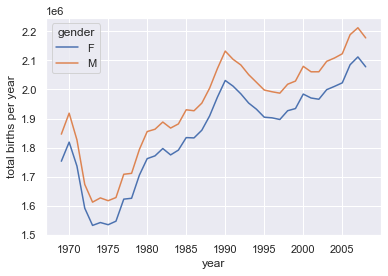

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

##### Further data exploration

In [13]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [14]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [15]:
# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

In [16]:
# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + 
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

import matplotlib.pyplot as plt
import matplotlib as mpl

C:\Users\PERSONNE\AppData\Local\Temp\ipykernel_5808\3544147270.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


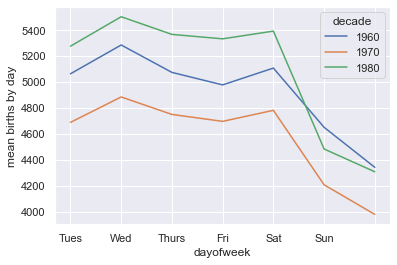

In [17]:
births.pivot_table('births', index='dayofweek',
                   columns='decade', aggfunc='mean').plot()

plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');